In [41]:
import matplotlib.pyplot as plt

In [58]:
import os
import json

# Define the path to the results folders
results_folder = 'results'
consistency_type = 'risk'
samples = 50
# Get the list of folders in the results folder
folders = os.listdir(results_folder)
data_dict = {}

# Iterate over the folders
for folder in folders:
    # Construct the path to the results.json file
    results_file = os.path.join(results_folder, folder, 'data', 'results.json')
    if consistency_type not in folder:
        print(f"Skipping folder: {folder}")
        continue
    if str(samples) not in folder:
        print(f"Skipping folder: {folder}")
        continue
    # Check if the results.json file exists
    if not os.path.exists(results_file):
        print(f"File not found: {results_file}")
        continue
        
    with open(results_file, 'r') as f:
        data = json.load(f)
    
    # Split the folder name by underscore and select the part you need
    edited_folder_name = '_'.join(folder.split('_')[2:3])

    # Store the data in the dictionary, using the edited folder name as the key
    data_dict[edited_folder_name] = data

Skipping folder: 2024-05-25-15-02-02_textual_vanilla_classifier_samples_50
Skipping folder: 2024-05-25-15-15-34_textual_softmax_samples_50
Skipping folder: 2024-05-25-15-28-49_textual_MLP__samples_50
Skipping folder: 2024-05-25-15-46-57_textual_transformer_linear_512__samples_50
Skipping folder: 2024-05-25-16-07-13_textual_transformer_MLP_512__samples_50


In [61]:
data_dict.keys()

dict_keys(['softmax', 'vanilla', 'transformer'])

In [62]:
del data_dict['transformer']

In [63]:
deltas = data_dict['softmax']['deltas']
lambda_list = [(key, data_dict[key]['lambdas']) for key in data_dict.keys()]
L_val_list = [(key, data_dict[key]['L_vals']) for key in data_dict.keys()]
exit_layer_list = [(key, [dic['predict_block_avg'] for dic in data_dict[key]['metrics']]) for key in data_dict.keys()]

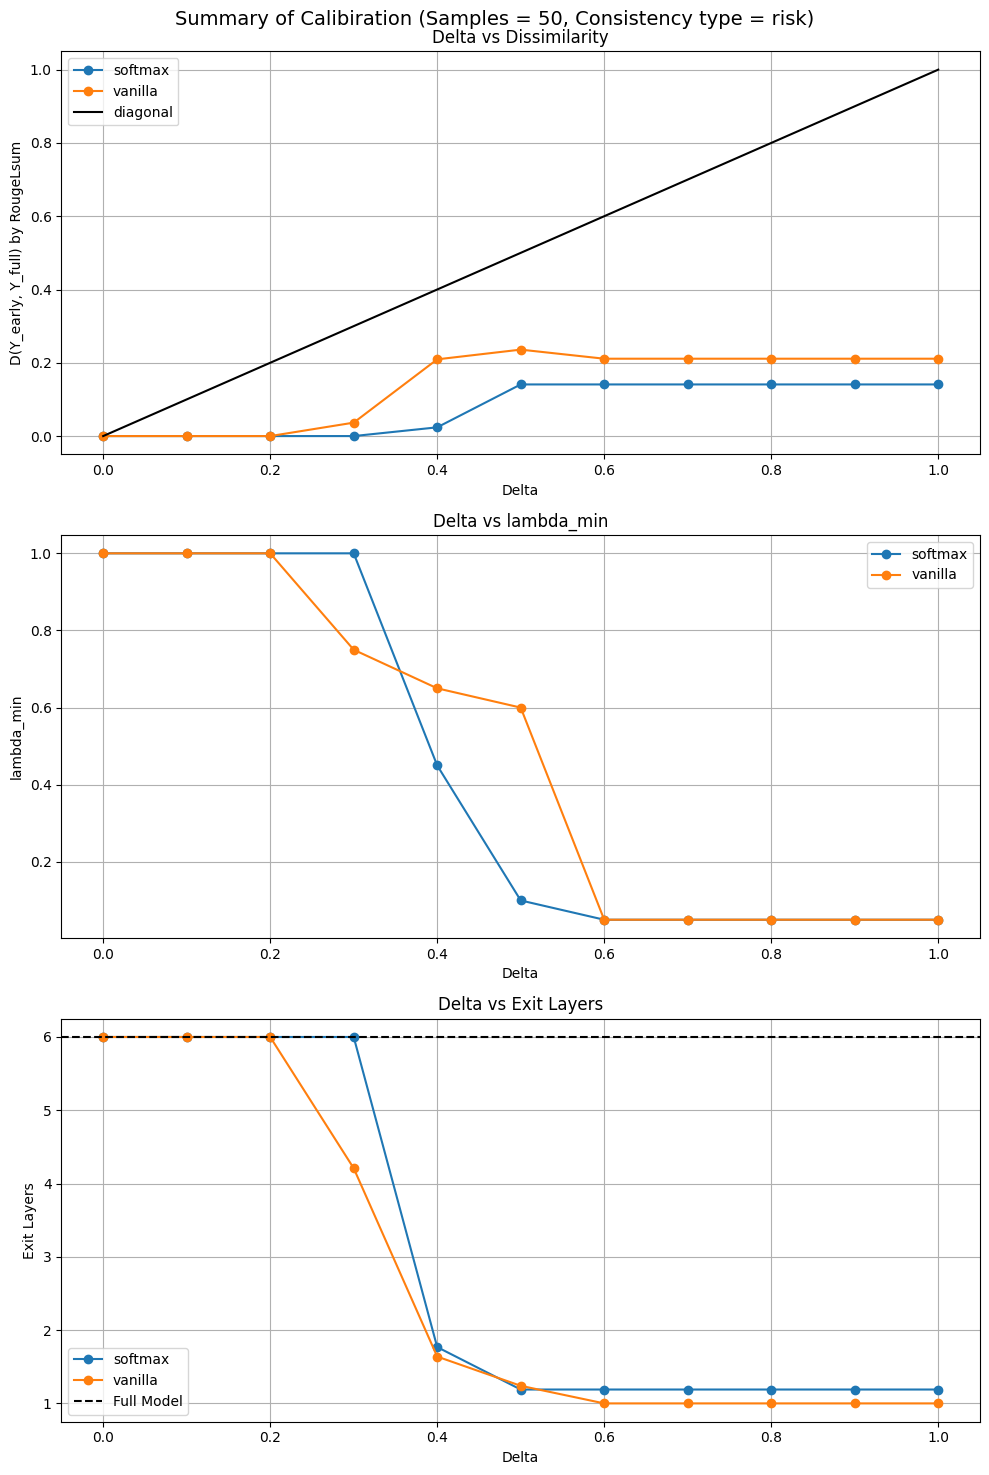

In [71]:

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for name, model_performance in L_val_list:
    axs[0].plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
axs[0].plot([0, 1], [0, 1], color='black', label='diagonal')
axs[0].set_title('Delta vs Dissimilarity')
axs[0].set_xlabel('Delta')
axs[0].set_ylabel('D(Y_early, Y_full) by RougeLsum')
axs[0].grid(True)
axs[0].legend()

for name, model_performance in lambda_list:
    axs[1].plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
axs[1].set_title('Delta vs lambda_min')
axs[1].set_xlabel('Delta')
axs[1].set_ylabel('lambda_min')
axs[1].grid(True)
axs[1].legend()

for name, model_performance in exit_layer_list:
    axs[2].plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
axs[2].set_title('Delta vs Exit Layers')
axs[2].axhline(y=6, color='black', linestyle='--', label='Full Model')  # Add horizontal line
axs[2].set_xlabel('Delta')
axs[2].set_ylabel('Exit Layers')
axs[2].grid(True)
axs[2].legend()
fig.suptitle(f'Summary of Calibiration (Samples = {samples}, Consistency type = {consistency_type})', fontsize=14)
plt.tight_layout()

plt.show()

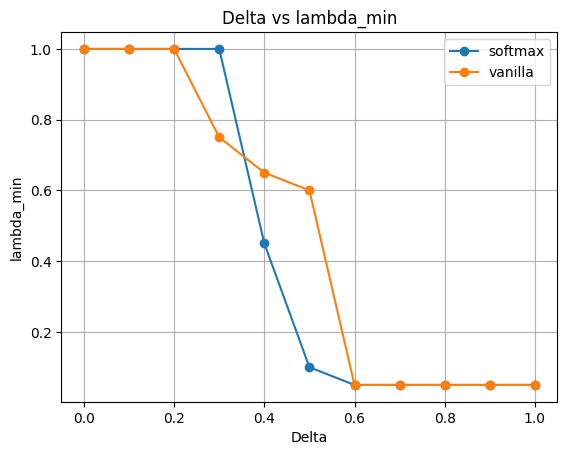

In [65]:
for name, model_performance in lambda_list:
    plt.plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
plt.title('Delta vs lambda_min')
plt.xlabel('Delta')
plt.ylabel('lambda_min')
plt.grid(True)
plt.legend()

# Show plot
plt.show()

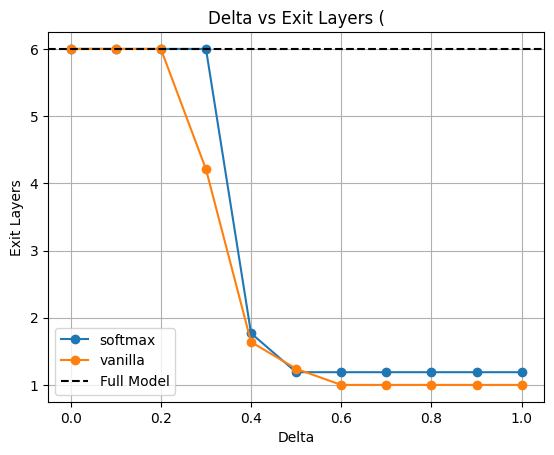

In [55]:
for name, model_performance in exit_layer_list:
    plt.plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
plt.title(f'Delta vs Exit Layers (')
plt.axhline(y=6, color='black', linestyle='--', label='Full Model')  # Add horizontal line
plt.xlabel('Delta')
plt.ylabel('Exit Layers')
plt.grid(True)
plt.legend()

# Show plot
plt.show()

# Sample size effects

In [109]:
import os
import json
import matplotlib.pyplot as plt

# Define the path to the results folders
results_folder = 'results'

# Filter criteria
consistency_type = 'risk'  # Change this to your desired consistency type

# Function to parse the folder names and extract sample size
def parse_folder_name(folder_name):
    parts = folder_name.split('_')
    return {
        'timestamp': parts[0],
        'model_type': parts[2],
        'consistency_type': parts[1],
        'samples': int(parts[-1])
    }

# Get the list of folders in the results folder
folders = os.listdir(results_folder)
data_dict = {}


In [110]:
folders

['2024-05-25-15-02-02_textual_vanilla_classifier_samples_50',
 '2024-05-25-15-15-34_textual_softmax_samples_50',
 '2024-05-25-15-28-49_textual_MLP__samples_50',
 '2024-05-25-15-46-57_textual_transformer_linear_512__samples_50',
 '2024-05-25-16-07-13_textual_transformer_MLP_512__samples_50',
 '2024-05-25-18-46-22_risk_vanilla_classifier_samples_50',
 '2024-05-25-18-48-53_risk_transformer_linear_512_samples_50',
 '2024-05-26-10-00-36_risk_softmax_5',
 '2024-05-26-10-06-38_risk_softmax_10',
 '2024-05-26-10-16-01_risk_softmax_15',
 '2024-05-26-10-27-26_risk_softmax_20']

In [111]:
# Iterate over the folders and filter by consistency type
for folder in folders:
    folder_info = parse_folder_name(folder)
    print(folder_info)
    if folder_info['consistency_type'] != consistency_type:
        continue
    
    # Construct the path to the results.json file
    results_file = os.path.join(results_folder, folder, 'data', 'results.json')
    
    if not os.path.exists(results_file):
        print(f"File not found: {results_file}")
        continue
    
    with open(results_file, 'r') as f:
        data = json.load(f)
    
    # Store the data in the dictionary, using the sample size as the key
    sample_size = folder_info['samples']
    data_dict[sample_size] = []
    
    data_dict[sample_size].append(data)

{'timestamp': '2024-05-25-15-02-02', 'model_type': 'vanilla', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-15-15-34', 'model_type': 'softmax', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-15-28-49', 'model_type': 'MLP', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-15-46-57', 'model_type': 'transformer', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-16-07-13', 'model_type': 'transformer', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-18-46-22', 'model_type': 'vanilla', 'consistency_type': 'risk', 'samples': 50}
{'timestamp': '2024-05-25-18-48-53', 'model_type': 'transformer', 'consistency_type': 'risk', 'samples': 50}
{'timestamp': '2024-05-26-10-00-36', 'model_type': 'softmax', 'consistency_type': 'risk', 'samples': 5}
{'timestamp': '2024-05-26-10-06-38', 'model_type': 'softmax', 'consistency_type': 'risk', 'samples': 10}
{'timestamp': '2024-05-26-10-16-0

In [112]:
data_dict.keys()

dict_keys([50, 5, 10, 15, 20])

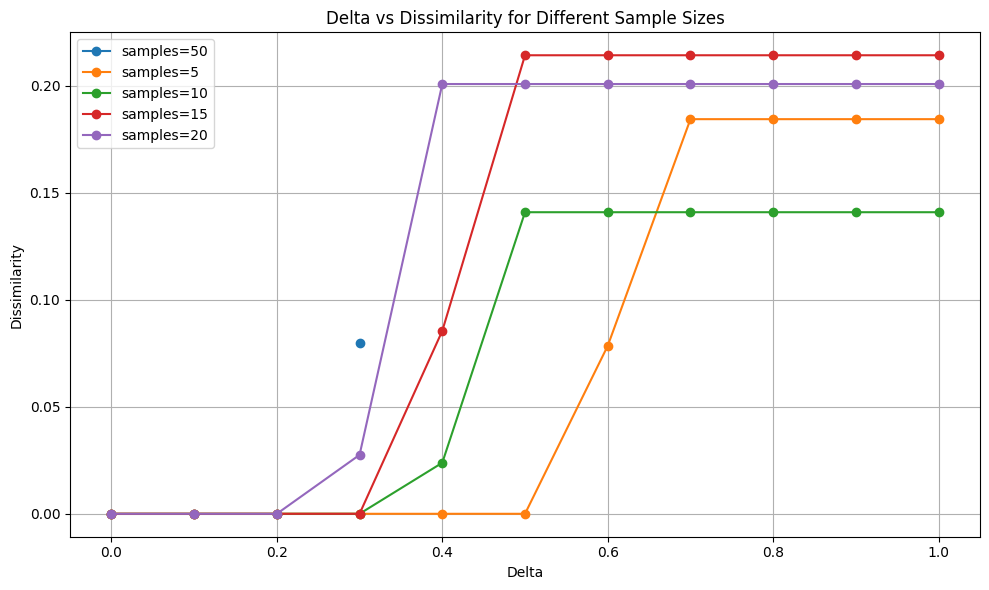

In [113]:



# Example keys for deltas and dissimilarities (update these based on your JSON structure)
delta_key = 'deltas'
dissimilarity_key = 'L_vals'

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for sample_size, data_list in data_dict.items():
    # Aggregate deltas and dissimilarities for each sample size
    deltas = []
    dissimilarities = []
    for data in data_list:
        deltas.extend(data[delta_key])
        dissimilarities.extend(data[dissimilarity_key])
    
    ax.plot(deltas, dissimilarities, marker='o', label=f'samples={sample_size}')

# Adding labels and title
ax.set_title('Delta vs Dissimilarity for Different Sample Sizes')
ax.set_xlabel('Delta')
ax.set_ylabel('Dissimilarity')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()
